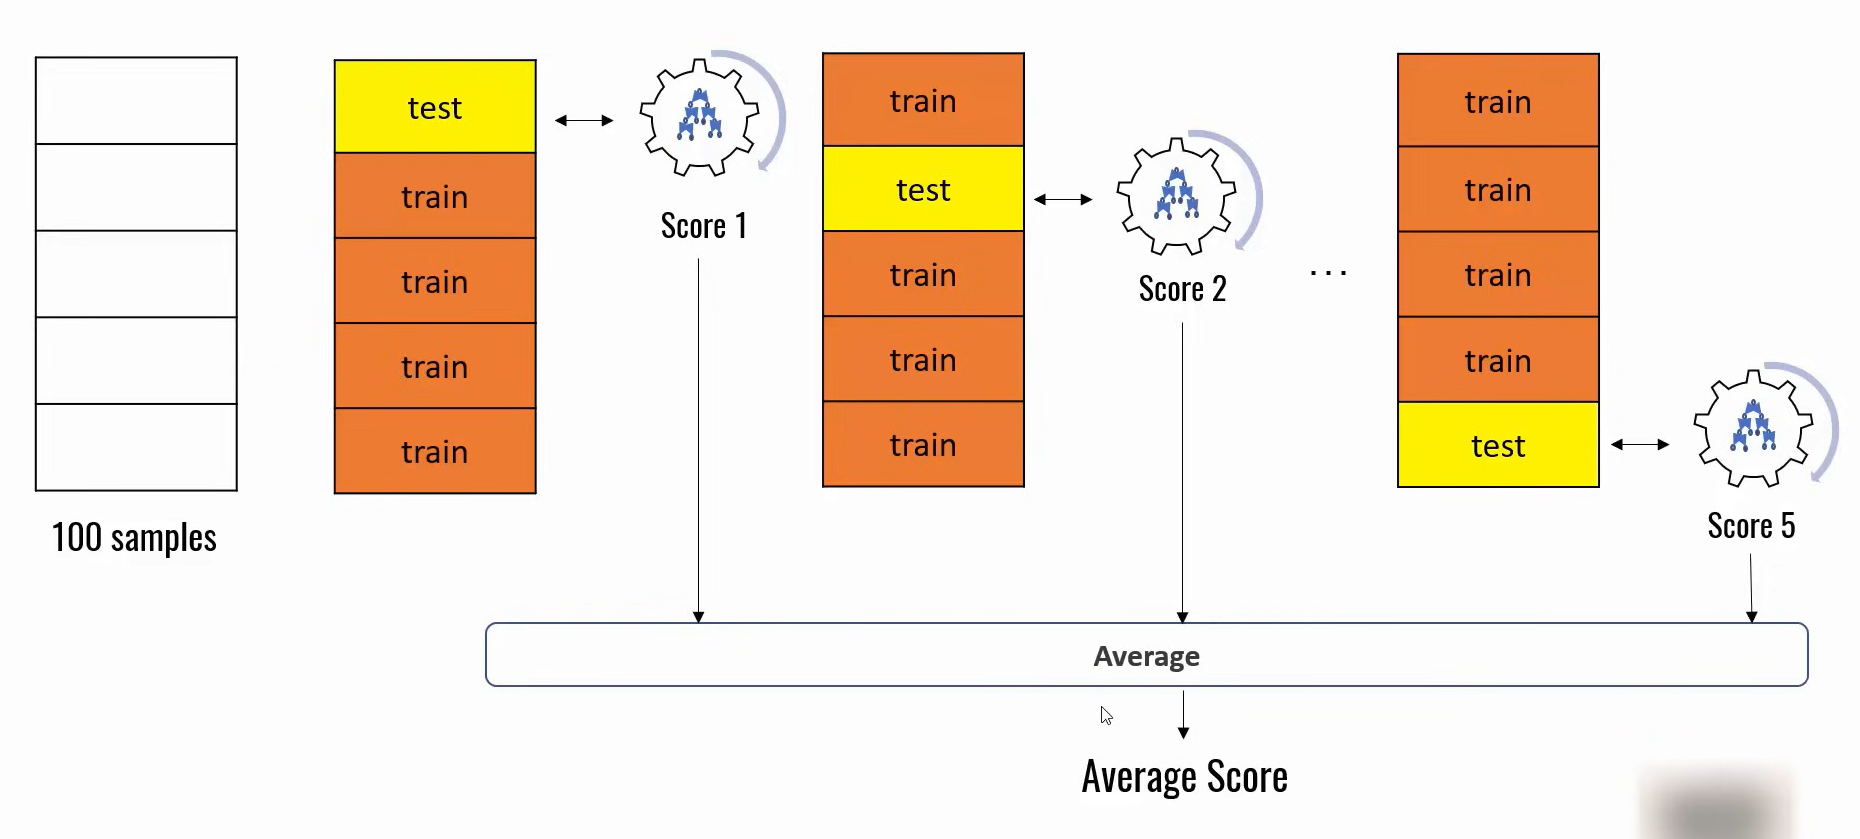

## K-Fold Cross Validation

When we are not sure which model will perform best for a particular problem,  
**K-Fold Cross Validation** helps us evaluate models more reliably.

Instead of training and testing a model on a single train–test split,  
K-Fold Cross Validation splits the dataset into **K equal parts (folds)**.

### How K-Fold Cross Validation Works

1. The dataset is divided into **K folds**.
2. The model is trained **K times**.
3. In each iteration:
   - One fold is used as the **test set**.
   - The remaining **K−1 folds** are used as the **training set**.
4. The final model performance is calculated as the **average score** across all folds.

This approach ensures that:
- Every data point is used for both training and testing.
- Model evaluation is more stable and less dependent on a single data split.

---

## Why Use K-Fold Cross Validation?

- Helps compare multiple models fairly
- Reduces overfitting caused by a single train–test split
- Gives a better estimate of real-world performance
- Useful when dataset size is limited

---

## Stratified K-Fold Cross Validation

In **classification problems**, datasets often contain **unequal class distributions**.

**Stratified K-Fold** ensures that:
- Each fold maintains the **same class proportion** as the original dataset
- No fold contains only one class
- Training and testing data remain representative

### Why Stratification Matters

Without stratification:
- One fold may contain mostly one class
- Model evaluation becomes biased or misleading

With stratification:
- Class balance is preserved in every fold
- Evaluation metrics like precision and recall become more reliable

---

## When to Use Which?

| Scenario | Recommended Method |
|--------|-------------------|
Small dataset | K-Fold Cross Validation |
Classification with imbalanced data | Stratified K-Fold |
Model comparison | K-Fold / Stratified K-Fold |
Final model evaluation | Stratified K-Fold |

---

## Summary

- K-Fold Cross Validation improves model evaluation reliability
- Stratified K-Fold is essential for classification problems
- These techniques are especially useful when the best model is unknown
- They help prevent biased and misleading performance results


In [6]:
from sklearn.datasets import load_digits
digits=load_digits()

In [5]:
from sklearn.model_selection import KFold,StratifiedKFold
kf=KFold(n_splits=3)
skf=StratifiedKFold(n_splits=3)

In [3]:
for train_ind,test_ind in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_ind,test_ind)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [30]:
from sklearn.svm import SVC
svc=SVC()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
def get_score(model,x_train, x_test, y_train, y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [32]:
score_lr=[]
score_svc=[]
score_rf=[]

for train_ind,test_ind in skf.split(digits.data,digits.target):
    x_train,x_test,y_train,y_test=digits.data[train_ind],digits.data[test_ind],digits.target[train_ind],digits.target[test_ind]
    score_svc.append(get_score(svc,x_train,x_test,y_train,y_test))
    score_lr.append(get_score(lr,x_train,x_test,y_train,y_test))
    score_rf.append(get_score(rf,x_train,x_test,y_train,y_test))

C:\Users\kamal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kamal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [33]:
score_lr

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [34]:
score_svc

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [35]:
score_rf

[0.9482470784641068, 0.9532554257095158, 0.9265442404006677]

In [45]:
# in order to avoid doing the above code manually we use cross validation that splits and trains the model in single call

from sklearn.model_selection import cross_val_score


In [41]:
cvs=cross_val_score(SVC(),digits.data,digits.target)
cvs


array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [42]:
cvs=cross_val_score(LogisticRegression(),digits.data,digits.target)
cvs

C:\Users\kamal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kamal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [44]:
cvs=cross_val_score(RandomForestClassifier(),digits.data,digits.target)
cvs

array([0.925     , 0.91111111, 0.95264624, 0.96100279, 0.92479109])